# Exploratory Analysis

Libraries Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

## Import Dataset

In [2]:
df = pd.read_csv('coin_Litecoin.csv', sep=',')

df.head()

,ds,open,high,low,close,macd,rsi,adx,cci
0,2017-10-02 23:59:59,54.546902,54.784801,53.257999,53.375999,-1.189811,48.510935,21.446567,50.385457
1,2017-10-03 23:59:59,53.390400,53.592999,51.586601,52.349602,-1.178141,47.280565,21.090984,37.528992
2,2017-10-04 23:59:59,52.284302,53.046101,50.830399,51.399502,-1.231363,46.114634,20.898073,15.541913
3,2017-10-05 23:59:59,51.401402,51.865501,50.440498,51.669498,-1.237490,46.518251,20.792471,-6.902622
4,2017-10-06 23:59:59,51.636002,52.603100,51.530499,52.120098,-1.192243,47.228670,20.480701,13.353078


The rows have daily information

## Dataset Properties

In [3]:
print(df.info())
print("\n", "Shape: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1245 non-null   object 
 1   open    1245 non-null   float64
 2   high    1245 non-null   float64
 3   low     1245 non-null   float64
 4   close   1245 non-null   float64
 5   macd    1245 non-null   float64
 6   rsi     1245 non-null   float64
 7   adx     1245 non-null   float64
 8   cci     1245 non-null   float64
dtypes: float64(8), object(1)
memory usage: 87.7+ KB
None

 Shape:  (1245, 9)


To be noted:
- 1245 rows
- 9 variables
- No null values
- All of them floats but the first one (the date one)
- 9 columns to analyse

Variables:
- ds: Day of the retrieval of data
- open: Value at the start of the day
- high: The highest value of the day
- low: The lowest value of the day
- close: Value at the close of the date
- macd: Moving Average Convergence Divergence, it's the difference between two moving averages, usually the 26-period and 12-period. It's and indicator that signals if a market is rising (above 0) or dropping (below 0)
- rsi: Relative Strength Index, measures the speed of price movement using concepts of average gain and average loss. It gives an indication if the market is poised to fall (RSI above 70) or rise (RSI below 30) 
- adx: Average Directional Index, is a measure of trend strength. If this indicator is above 25 it means that the market is trending; if below 25 the market is meandering 
- cci: Commodity Channel Index, measures price momentum. If the indicator is above 100 it's the best time to sell; if bellow -100 it's the best time to buy

In [4]:
print(df.describe())

              open         high          low        close         macd  \
count  1245.000000  1245.000000  1245.000000  1245.000000  1245.000000   
mean     84.322423    87.711292    80.665659    84.395313     0.713638   
std      54.426420    57.880807    50.483571    54.434201     8.773965   
min      23.462881    23.754460    22.824781    23.464330   -22.188999   
25%      48.002123    49.283763    46.746178    48.008806    -2.813472   
50%      61.242918    63.070722    59.491600    61.295200    -0.152484   
75%     101.106799   104.844002    97.314697   101.153999     3.095588   
max     359.125000   375.286011   335.674988   358.335999    68.261190   

               rsi          adx          cci  
count  1245.000000  1245.000000  1245.000000  
mean     50.182374    30.009533     6.322177  
std      13.334699    10.974810   120.737252  
min      16.663033     9.501988  -285.138423  
25%      40.264788    21.722679   -79.595333  
50%      48.680966    27.642164    -1.761653  
75% 

To be noted:
- Only negative values are from the variables "macd" and "cci"
- The indexes means are very close to the point the market turns. For example, to "macd" the point where the market turns is 0, and the mean is equal to 0.0714

In [5]:
print(df.iloc[[0], [0]])

print(df.iloc[[1244], [0]])

                    ds
0  2017-10-02 23:59:59
                       ds
1244  2021-02-27 23:59:59


Data starts in 02-10-2017 and ends in 27-02-2021

Change ds from objecttype to datetype

In [6]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1245 non-null   datetime64[ns]
 1   open    1245 non-null   float64       
 2   high    1245 non-null   float64       
 3   low     1245 non-null   float64       
 4   close   1245 non-null   float64       
 5   macd    1245 non-null   float64       
 6   rsi     1245 non-null   float64       
 7   adx     1245 non-null   float64       
 8   cci     1245 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 87.7 KB


Change date variable to index

In [7]:
df = df.set_index(df['ds'])

# Exclude ds column from dataset
df.drop('ds', axis=1, inplace=True)

df.head()

,open,high,low,close,macd,rsi,adx,cci
ds,,,,,,,,
2017-10-02 23:59:59,54.546902,54.784801,53.257999,53.375999,-1.189811,48.510935,21.446567,50.385457
2017-10-03 23:59:59,53.390400,53.592999,51.586601,52.349602,-1.178141,47.280565,21.090984,37.528992
2017-10-04 23:59:59,52.284302,53.046101,50.830399,51.399502,-1.231363,46.114634,20.898073,15.541913
2017-10-05 23:59:59,51.401402,51.865501,50.440498,51.669498,-1.237490,46.518251,20.792471,-6.902622
2017-10-06 23:59:59,51.636002,52.603100,51.530499,52.120098,-1.192243,47.228670,20.480701,13.353078


Define date frequency

In [8]:
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1245 entries, 2017-10-02 23:59:59 to 2021-02-27 23:59:59
Freq: D
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1245 non-null   float64
 1   high    1245 non-null   float64
 2   low     1245 non-null   float64
 3   close   1245 non-null   float64
 4   macd    1245 non-null   float64
 5   rsi     1245 non-null   float64
 6   adx     1245 non-null   float64
 7   cci     1245 non-null   float64
dtypes: float64(8)
memory usage: 87.5 KB


## Data Plots

- Line Plot

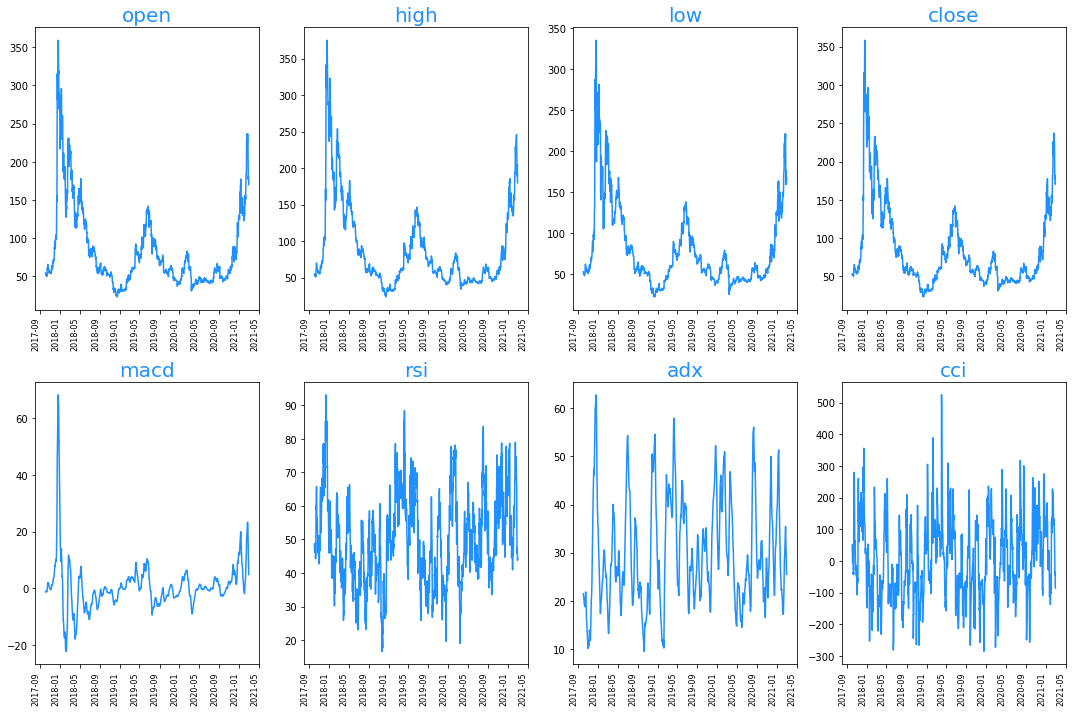

In [9]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

cols = list(df.columns)

y = 0

for c in cols:
    i, j = divmod(y, 4)
    df[c].plot(ax=axes[i, j], color="dodgerblue")
    axes[i, j].set_title(c, fontsize='20', color='dodgerblue')
    axes[i, j].tick_params(axis='x', rotation=90, labelsize=8)
    y = y + 1

plt.tight_layout()
plt.show()

At a first glance it is possible to see a clear relation with the first four variables. This correlation is due to them being retrieved on the same day (open, high, low, close) and from the same source (value of the coin), which indicates that the close value from one day is the open value of the next one. It also indicates that there is not much change in the same day.
rsi, adx and cci seem to have some kind of correlation too, because they all are market indicators
The only variable that does not have correlation with other variables is the macd one

- Histograms

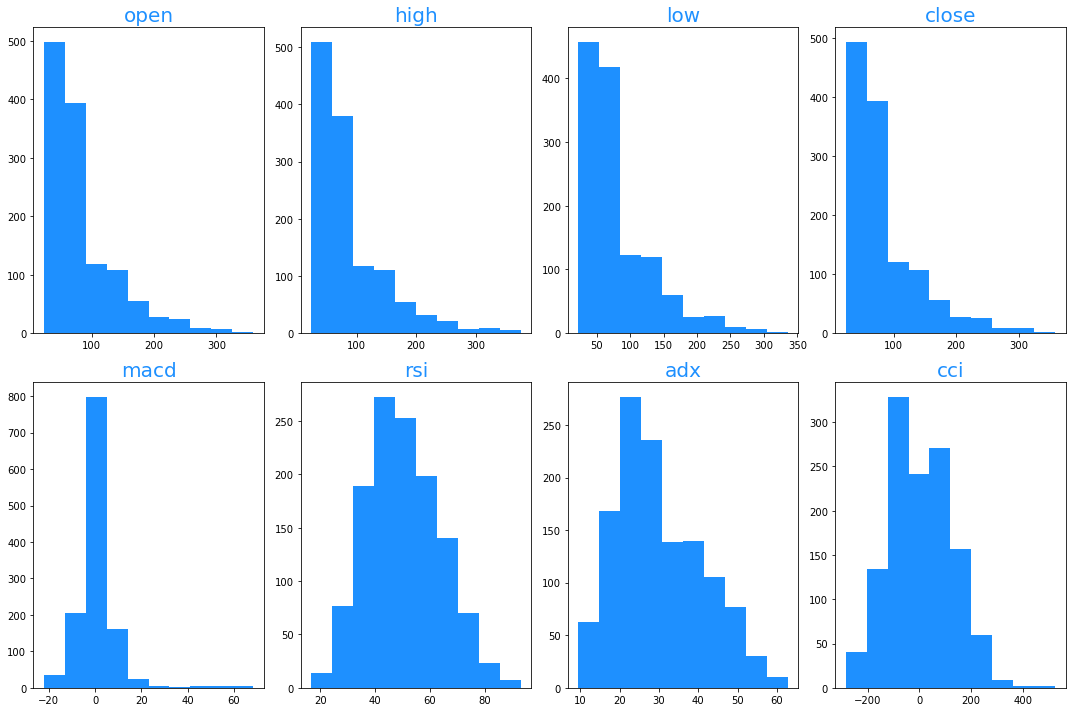

In [10]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

y = 0

for c in cols:
    i, j = divmod(y, 4)
    axes[i, j].hist(x=df[c], color="dodgerblue")
    axes[i, j].set_title(c, fontsize='20', color="dodgerblue")
    y = y + 1

plt.tight_layout()
plt.show()

It is possible to see the same relation in the histograms

## Outliers Analysis

In [11]:
def outlier_thresholds(col_name, q1_perc=0.05, q3_perc=0.95):
    quartile1 = df[col_name].quantile(q1_perc)
    quartile3 = df[col_name].quantile(q3_perc)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(col_name, q1_perc=0.01, q3_perc=0.99):
    outlier_list = []
    low_limit, up_limit = outlier_thresholds(col_name,
                                             q1_perc=0.01,
                                             q3_perc=0.99)
    if df[(df[col_name] > up_limit) |
          (df[col_name].dropna() < low_limit)].any(axis=None):
        return True

    else:
        return False

In [12]:
for c in cols:
    print(c, check_outlier(c))

open False
high False
low False
close False
macd False
rsi False
adx False
cci False


No detected outliers

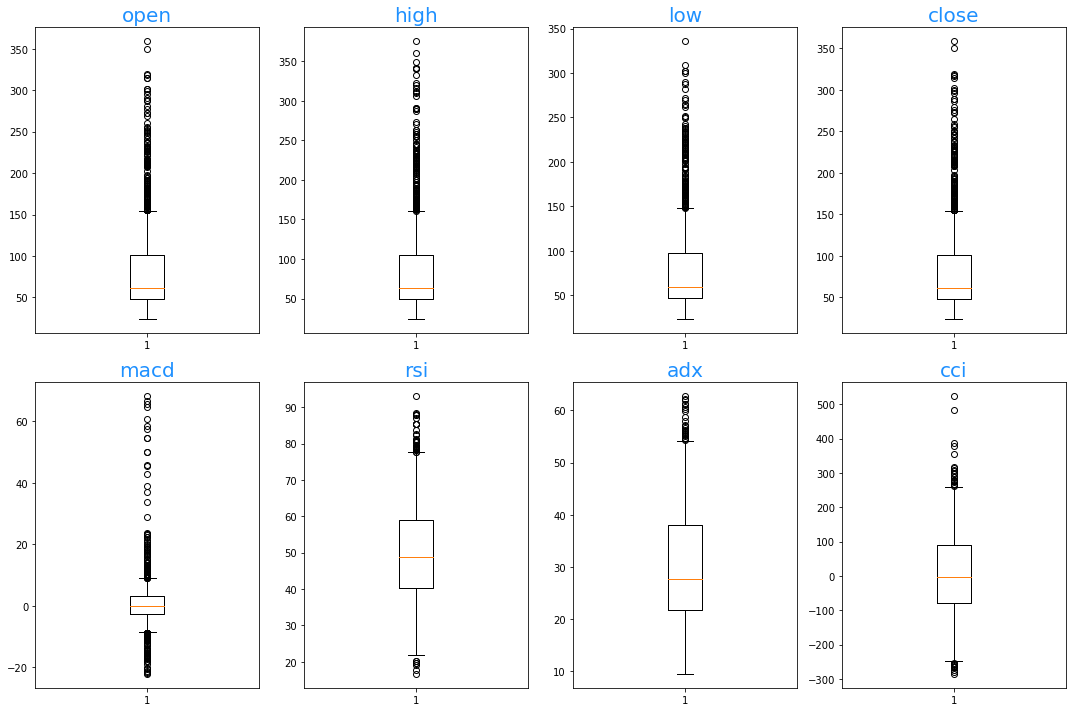

In [13]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

y = 0

for c in cols:
    i, j = divmod(y, 4)
    axes[i, j].boxplot(x=df[c], sym="o", whis=1)
    axes[i, j].set_title(c, fontsize='20', color="dodgerblue")
    y = y + 1

plt.tight_layout()
plt.show()

## Correlation

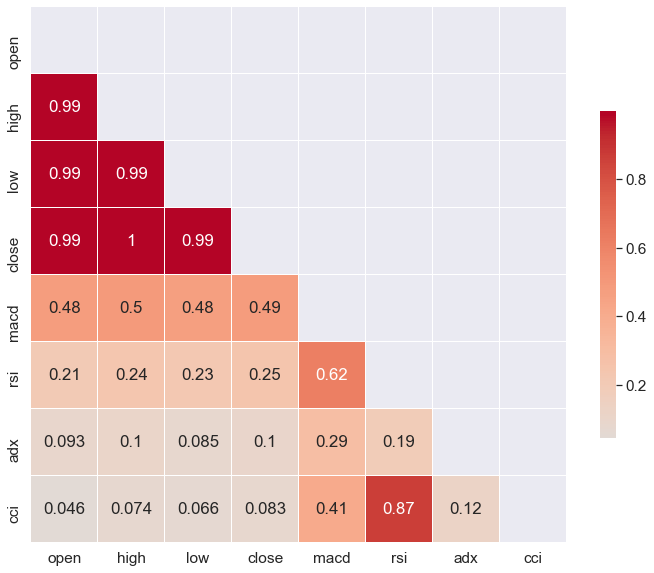

In [14]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.4)
sns.heatmap(corr,
            mask=mask,
            center=0,
            annot=True,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap="coolwarm")
plt.show()

As previously mentioned it is possible to see that the open, high, low and close variables all have an extremely high correlation, so it is possible to infer that they are almost the same.
Also the macd has some good correlation with those variables too (about 0.5).
There is a great correlation between rsi and cci (both considered trading oscillators) and between rsi and macd.
Previously it was said mentioned that macd seemed to be the only variable that was unrelated, but looking at this plot the least correlated variable is actually adx, which the highest correlation value it has is 0.29 with macd.
It is also important to note that there is no negative correlations on the dataset

With this in mind there is no need of having 4 different variables that give the same amount of information (open, close, high, low), so 3 of them will be removed from the dataset

In [15]:
df = df.drop(columns=['open', 'high', 'low'])

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1245 entries, 2017-10-02 23:59:59 to 2021-02-27 23:59:59
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1245 non-null   float64
 1   macd    1245 non-null   float64
 2   rsi     1245 non-null   float64
 3   adx     1245 non-null   float64
 4   cci     1245 non-null   float64
dtypes: float64(5)
memory usage: 58.4 KB


## Scatterplot

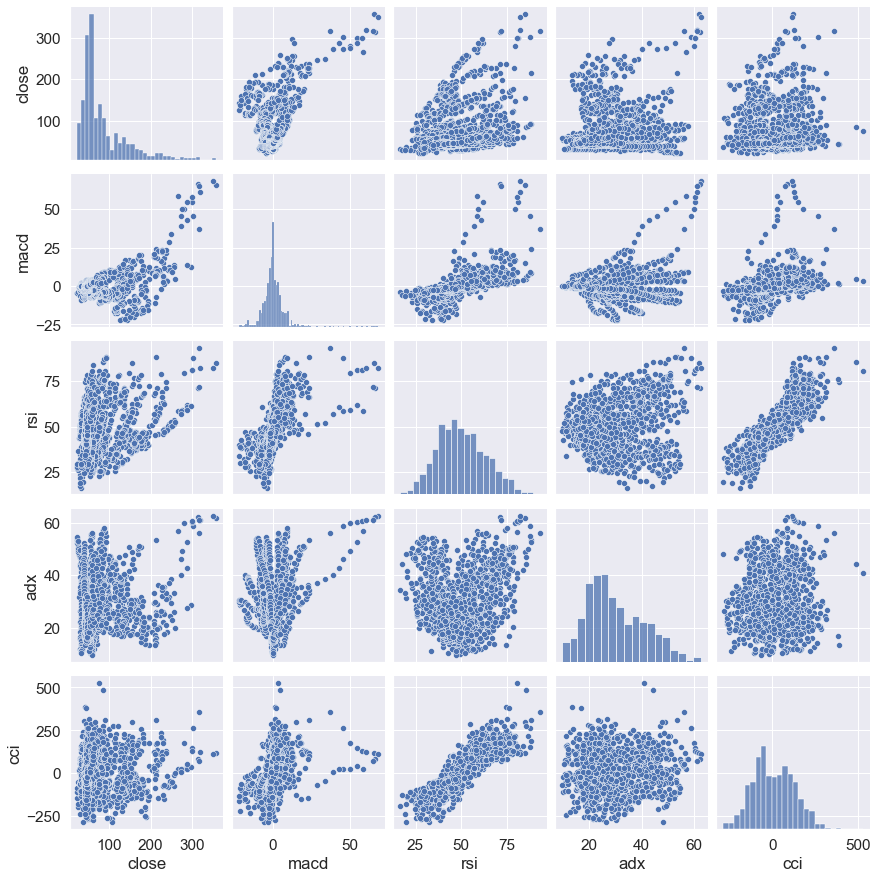

In [16]:
sns.pairplot(df)

Not very clear but it can be seen some sort of positive relation between the indexes and the close values (top row of plots)
RSI and CCI seem to have a strong correlation as seen previously.
ADX/CCI and ADX/RSI seem to have no correlation as also seen previously.

## Time Series Components

Subset variables in different tables with only the variable and the date

In [17]:
df.head()

,close,macd,rsi,adx,cci
2017-10-02 23:59:59,53.375999,-1.189811,48.510935,21.446567,50.385457
2017-10-03 23:59:59,52.349602,-1.178141,47.280565,21.090984,37.528992
2017-10-04 23:59:59,51.399502,-1.231363,46.114634,20.898073,15.541913
2017-10-05 23:59:59,51.669498,-1.237490,46.518251,20.792471,-6.902622
2017-10-06 23:59:59,52.120098,-1.192243,47.228670,20.480701,13.353078


In [18]:
df_close = df.reset_index()
df_close.drop(['macd', 'rsi','adx','cci'], axis='columns', inplace=True)
df_macd = df.reset_index()
df_macd.drop(['close', 'rsi','adx','cci'], axis='columns', inplace=True)
df_rsi = df.reset_index()
df_rsi.drop(['close', 'macd','adx','cci'], axis='columns', inplace=True)
df_adx = df.reset_index()
df_adx.drop(['close', 'rsi','macd','cci'], axis='columns', inplace=True)
df_cci = df.reset_index()
df_cci.drop(['close', 'rsi','adx','macd'], axis='columns', inplace=True)

In [19]:
df_close = df_close.set_index(df_close['index'])
df_close.drop('index', axis=1, inplace=True)
df_macd = df_macd.set_index(df_macd['index'])
df_macd.drop('index', axis=1, inplace=True)
df_rsi = df_rsi.set_index(df_rsi['index'])
df_rsi.drop('index', axis=1, inplace=True)
df_adx = df_adx.set_index(df_adx['index'])
df_adx.drop('index', axis=1, inplace=True)
df_cci = df_cci.set_index(df_cci['index'])
df_cci.drop('index', axis=1, inplace=True)

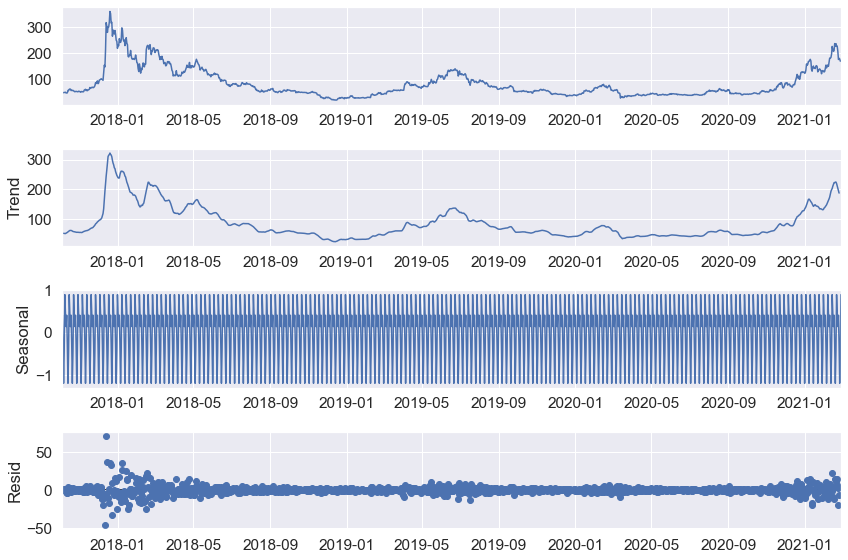

In [20]:
#Close
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams.update({'font.size': 14})
result_close = seasonal_decompose(df_close, model='additive')
result_close.plot()
plt.show()

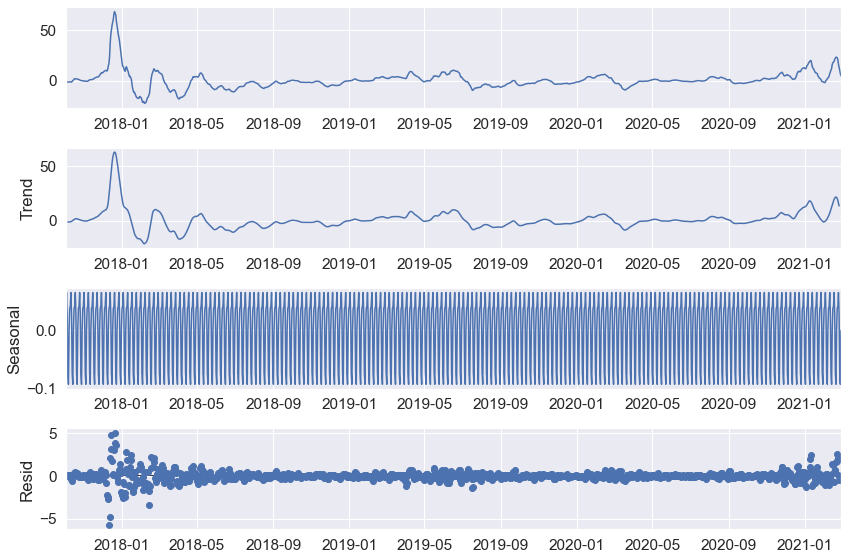

In [22]:
#MACD
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams.update({'font.size': 14})
result_close = seasonal_decompose(df_macd, model='additive')
result_close.plot()
plt.show()

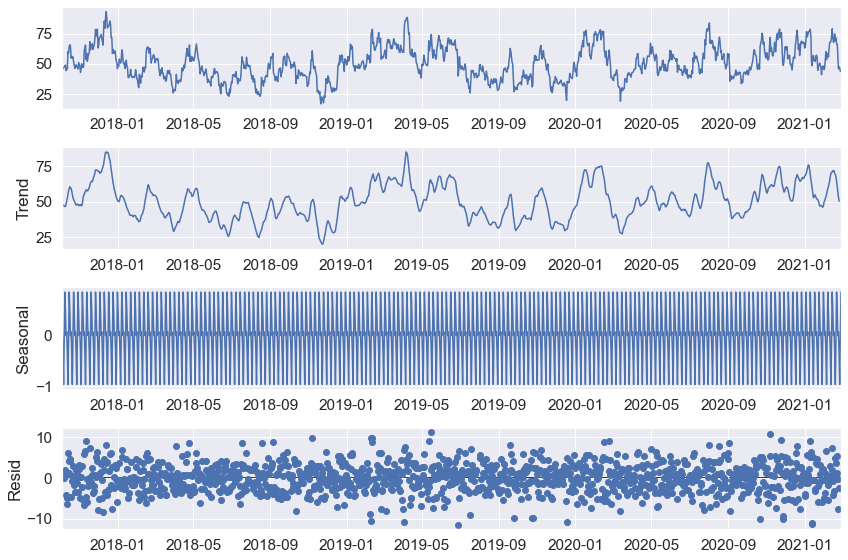

In [23]:
#RSI
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams.update({'font.size': 14})
result_close = seasonal_decompose(df_rsi, model='additive')
result_close.plot()
plt.show()

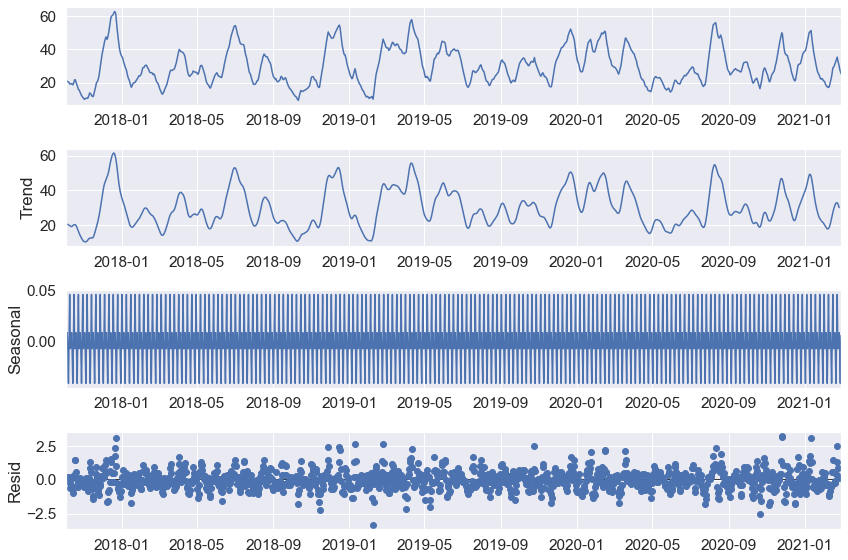

In [24]:
#ADX
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams.update({'font.size': 14})
result_close = seasonal_decompose(df_adx, model='additive')
result_close.plot()
plt.show()

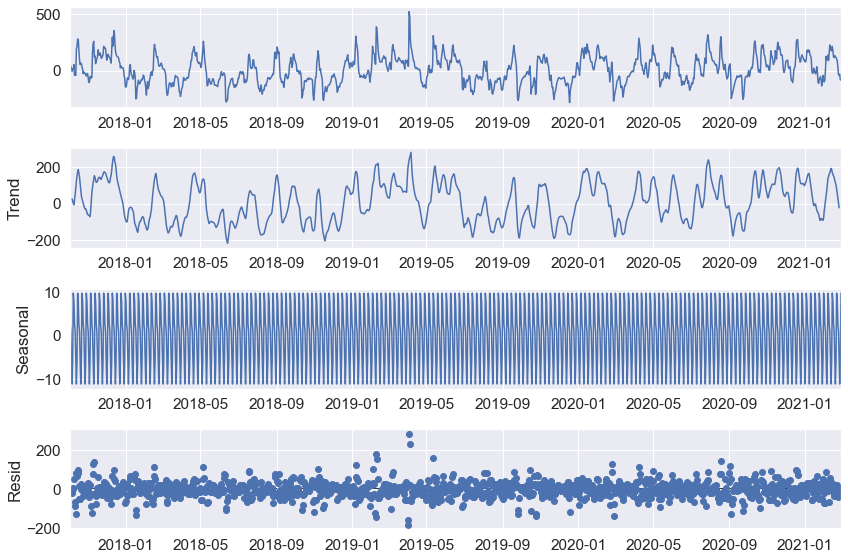

In [25]:
#CCI
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams.update({'font.size': 14})
result_close = seasonal_decompose(df_cci, model='additive')
result_close.plot()
plt.show()

# Export data to build other notebooks 

In [21]:
df.to_csv('coin_Litecoin_modified.csv')